# MNIST

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
import torchvision
from torchvision import datasets

from tqdm import tqdm

from constants import *

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
train_loader = torch.utils.data.DataLoader(mnist_trainset)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
train_loader = torch.utils.data.DataLoader(mnist_testset)

X_train, y_train = mnist_trainset.data, mnist_trainset.targets
X_test, y_test = mnist_testset.data, mnist_testset.targets
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [4]:
X_train = (X_train.reshape((-1, 28*28))/255).to(device)
y_train = y_train.to(device)

X_test = (X_test.reshape((-1, 28*28))/255).to(device)
y_test = y_test.to(device)

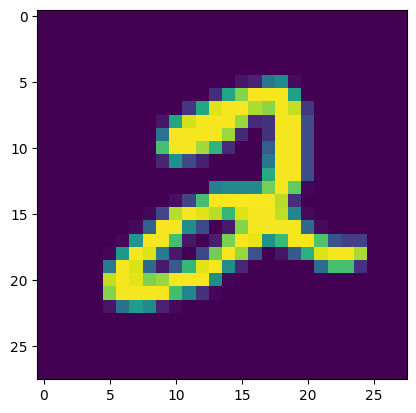

In [5]:
def show(i: int):
    plt.imshow(X_train[i].cpu().reshape((28, 28)))
show(5)

In [6]:
class MNIST(nn.Module):
  def __init__(self, dim=784, n_hidden=20):
    super().__init__()
    self.L1 = nn.Linear(dim, n_hidden).to(device)
    self.L2 = nn.Linear(n_hidden, 10).to(device)

  def forward(self, X, y=None):
    x = self.L2(torch.relu(self.L1(X)))
    logits = torch.softmax(x, dim=1)

    loss = None
    if y is not None:
      loss = F.cross_entropy(logits, y)
    return loss, logits

  def generate(self, X):
    loss, logits = self(X)
    return logits

In [15]:
n_samples, n_features =  X_train.shape
m = MNIST(n_features, n_hidden).to(device)
m(X_train, y_train)

(tensor(2.3030, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor([[0.1064, 0.0942, 0.1238,  ..., 0.0755, 0.0942, 0.0985],
         [0.0863, 0.0929, 0.1173,  ..., 0.0815, 0.1052, 0.1068],
         [0.0967, 0.0996, 0.1169,  ..., 0.0860, 0.1024, 0.0970],
         ...,
         [0.0954, 0.0899, 0.1262,  ..., 0.0787, 0.1003, 0.1043],
         [0.0880, 0.0927, 0.1199,  ..., 0.0791, 0.1055, 0.1075],
         [0.0935, 0.0959, 0.1238,  ..., 0.0807, 0.1086, 0.1123]],
        device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [16]:
optimizer = torch.optim.AdamW(m.parameters(), lr)

losses = []
for iter in range(n_iters):
  loss, logits = m(X_train, y_train)
  losses.append(loss.item())

  if iter % 200 == 0:
    print(loss.item())

  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

2.3030266761779785
1.9601699113845825
1.95947265625
1.5771960020065308
1.4771779775619507


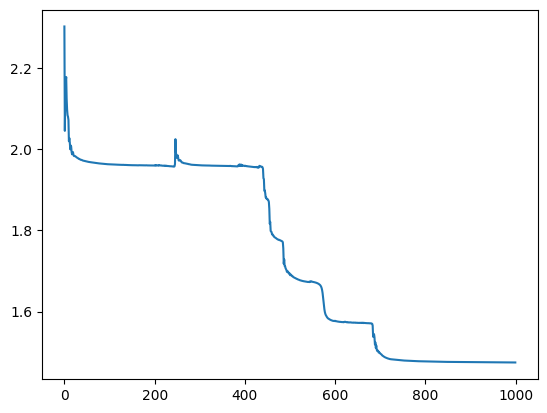

In [19]:
plt.plot(range(n_iters), losses)

In [18]:
acc = 0
for i, x in enumerate(tqdm(X_test)):
  loss, logits = m(x.unsqueeze(0))
  if torch.argmax(logits) == y_test[i]:
    acc += 1

print(acc/len(X_test))

100%|██████████| 10000/10000 [00:04<00:00, 2378.50it/s]

0.9646


## Points

accuracy was stuck around 30% when n_hidden = 20, increaing nn_hidden increased accuracy to 96%